# Air Quality Analysis of PM₁₀ in Badagry, Nigeria

This notebook analyzes the geochemical composition of PM₁₀ (Particulate Matter ≤ 10μm) collected in Badagry, Lagos State, Nigeria. The data was obtained through SEM-EDX analysis of the particulate samples gotten from Market, Residential, and Traffic zones.

## Loading the Dataset

I started by importing pandas and loading the cleaned dataset.

In [4]:
import pandas as pd 

In [7]:
aq_data = pd.read_csv("pm_10_badagry_sw.csv")
aq_data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Sample_ID,Location,Si,Mg,C,O,Ca,Na,K,Al,P,Mn,P
1,PB 1,Market Area,74.04,3.77,2,10.6,1.53,3.04,0.94,2.74,-,-,-
2,PB 2,Market Area,50.36,3.18,6.76,19.38,2.87,5.87,1.95,8.6,12.6,0.11,10.8
3,PB 3,Residential Area,58.6,0.35,5.2,10.3,3.34,15.4,-,3.2,-,-,0.11
4,PB 4,Traffic Area,54.81,3.19,2.96,20.21,1.49,8.55,1.29,4.91,11.27,0.26,1.02
5,PB 5,Traffic Area,54.02,4.35,3.25,18.61,1.75,8.61,0.72,3.64,12.93,0.23,-


## Data Cleaning & Preparation

The dataset contains missing entries represented as "-", and duplicate column names. In this step, I:
- Set correct column headers from "P' to "Pb".
- Replaced invalid entries.
- Converted all numeric columns for analysis.

In [18]:
# Set the first row as header
aq_data.columns = aq_data.iloc[0]
aq_data = aq_data.drop(index=0).reset_index(drop=True)


In [19]:
# Rename duplicate "P" column (last one) to "Pb
aq_data.columns = ['Sample_ID', 'Location', 'Si', 'Mg', 'C', 'O', 'Ca', 'Na', 'K', 'Al', 'P', 'Mn', 'Pb']

In [20]:
aq_data.replace('-', pd.NA, inplace=True)

In [21]:
# Convert numeric columns
numeric_cols = ['Si', 'Mg', 'C', 'O', 'Ca', 'Na', 'K', 'Al', 'P', 'Mn', 'Pb']
aq_data[numeric_cols] = aq_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

## Exploratory Data Analysis (EDA)

Here, I did basic statistical analysis and viewed the structure of the dataset using
- `.info()`
- `.describe()`
- `.head()`
- `.isnull().sum()`

In [69]:
aq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sample_ID  5 non-null      object 
 1   Location   5 non-null      object 
 2   Si         5 non-null      float64
 3   Mg         5 non-null      float64
 4   C          5 non-null      float64
 5   O          5 non-null      float64
 6   Ca         5 non-null      float64
 7   Na         5 non-null      float64
 8   K          4 non-null      float64
 9   Al         5 non-null      float64
 10  P          3 non-null      float64
 11  Mn         3 non-null      float64
 12  Pb         3 non-null      float64
dtypes: float64(11), object(2)
memory usage: 652.0+ bytes


In [70]:
aq_data.describe()

,Si,Mg,C,O,Ca,Na,K,Al,P,Mn,Pb
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,3.000000,3.000000,3.000000
mean,58.366000,2.968000,4.034000,15.820000,2.196000,8.294000,1.225000,4.618000,12.266667,0.200000,3.976667
std,9.237937,1.541207,1.916763,4.935803,0.852045,4.586418,0.537308,2.368316,0.878768,0.079373,5.926671
min,50.360000,0.350000,2.000000,10.300000,1.490000,3.040000,0.720000,2.740000,11.270000,0.110000,0.110000
25%,54.020000,3.180000,2.960000,10.600000,1.530000,5.870000,0.885000,3.200000,11.935000,0.170000,0.565000
50%,54.810000,3.190000,3.250000,18.610000,1.750000,8.550000,1.115000,3.640000,12.600000,0.230000,1.020000
75%,58.600000,3.770000,5.200000,19.380000,2.870000,8.610000,1.455000,4.910000,12.765000,0.245000,5.910000
max,74.040000,4.350000,6.760000,20.210000,3.340000,15.400000,1.950000,8.600000,12.930000,0.260000,10.800000


In [22]:
aq_data.head()

,Sample_ID,Location,Si,Mg,C,O,Ca,Na,K,Al,P,Mn,Pb
0,PB 1,Market Area,74.04,3.77,2.00,10.60,1.53,3.04,0.94,2.74,NaN,NaN,NaN
1,PB 2,Market Area,50.36,3.18,6.76,19.38,2.87,5.87,1.95,8.60,12.60,0.11,10.80
2,PB 3,Residential Area,58.60,0.35,5.20,10.30,3.34,15.40,NaN,3.20,NaN,NaN,0.11
3,PB 4,Traffic Area,54.81,3.19,2.96,20.21,1.49,8.55,1.29,4.91,11.27,0.26,1.02
4,PB 5,Traffic Area,54.02,4.35,3.25,18.61,1.75,8.61,0.72,3.64,12.93,0.23,NaN


In [72]:
aq_data.isnull().sum()

Sample_ID    0
Location     0
Si           0
Mg           0
C            0
O            0
Ca           0
Na           0
K            1
Al           0
P            2
Mn           2
Pb           2
dtype: int64

In [23]:
# Group by Location and calculate the mean for each element
aq_data.groupby('Location')[cols].mean()

,Si,Mg,C,O,Ca,Na,K,Al,P,Mn,Pb
Location,,,,,,,,,,,
Market Area,62.200,3.475,4.380,14.99,2.20,4.455,1.445,5.670,12.6,0.110,10.80
Residential Area,58.600,0.350,5.200,10.30,3.34,15.400,NaN,3.200,NaN,NaN,0.11
Traffic Area,54.415,3.770,3.105,19.41,1.62,8.580,1.005,4.275,12.1,0.245,1.02


##  Visualizations

I used `matplotlib` and `seaborn` to visualize the data.

###  Grouped Bar Chart
Shows the average element concentration per location.

###  Correlation Heatmap
Displays correlation between elements to spot co-occurrence.

###  Pie Chart
Visualizes element composition in the three sample locations(areas).



<Figure size 1200x600 with 0 Axes>

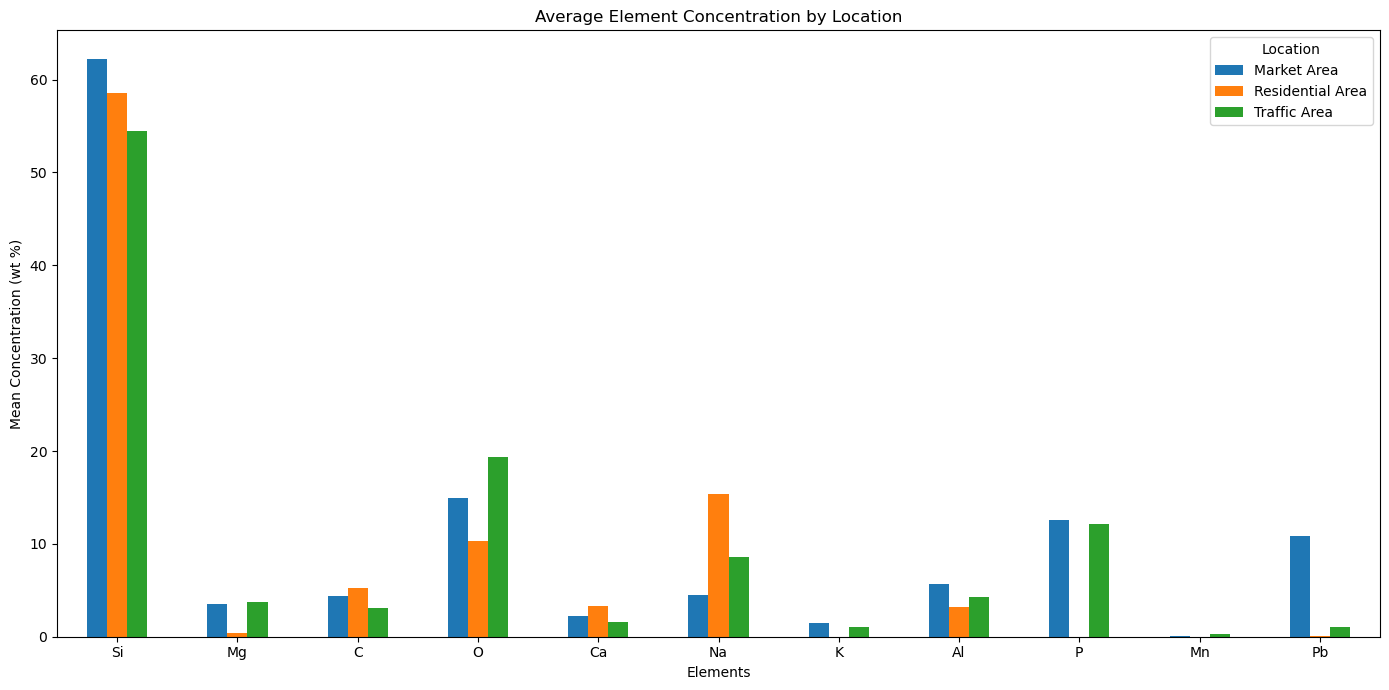

In [38]:
# Visualization of the grouped data using bar chart
import seaborn as sns
import matplotlib.pyplot as plt
aq_data.groupby('Location')[cols].mean()
plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', figsize=(14, 7))
plt.title('Average Element Concentration by Location')
plt.ylabel('Mean Concentration (wt %)')
plt.xlabel('Elements')
plt.xticks(rotation=0)
plt.legend(title='Location')
plt.tight_layout()
plt.show()

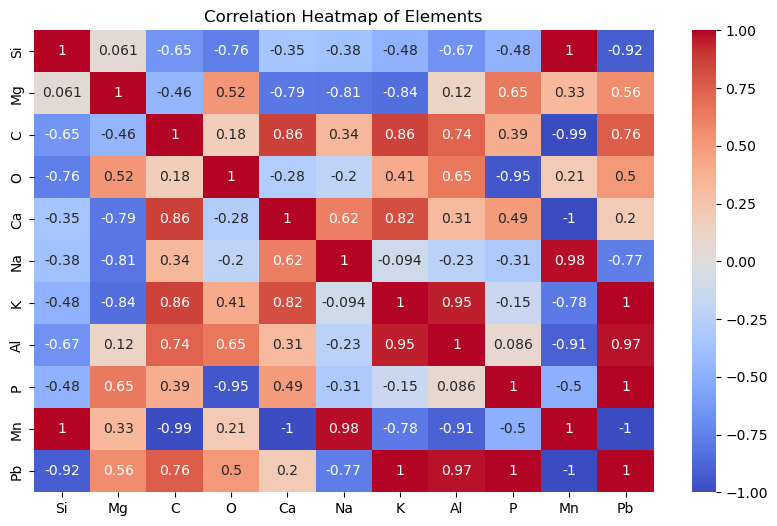

In [40]:
# Visualization showing the correlation between the elements 
plt.figure(figsize=(10, 6))
sns.heatmap(aq_data[cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Elements')
plt.show()

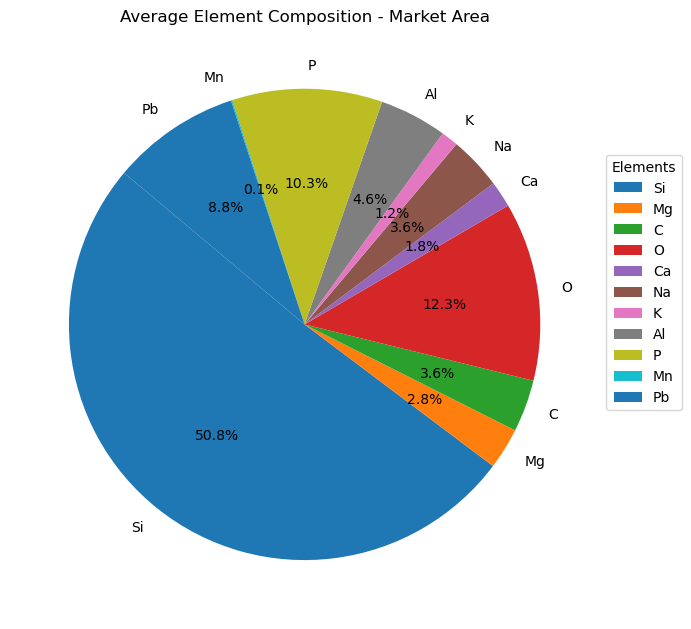

In [48]:
# Visualization of the Avearge elemental composition in the Market Area
market_avg = aq_data[aq_data['Location'] == 'Market Area'][cols].mean()
plt.figure(figsize=(7, 7))
market_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Average Element Composition - Market Area')
plt.ylabel('') 
plt.legend(market_avg.index, title="Elements", bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()
# The Market area has Aluminosilicate particles Al-Si–O as major elements with varying amounts of K-Mg-P-Na which occurs due to soil particles or anthropengenic activities.

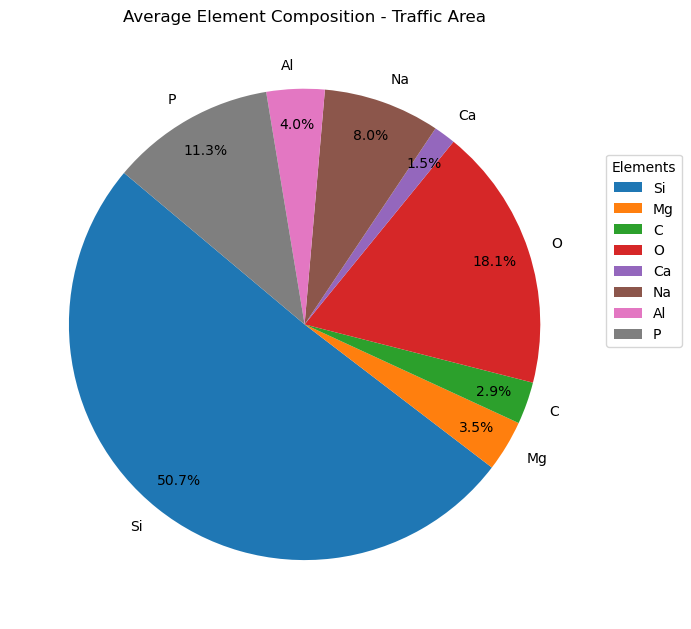

In [62]:
# Visualization of the Avearge elemental composition in the Traffic Area
traffic_avg = aq_data[aq_data['Location'] == 'Traffic Area'][cols].mean()
traffic_avg = traffic_avg[traffic_avg > 1.2]
plt.figure(figsize=(7, 7))
traffic_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140,  pctdistance=0.85, labeldistance=1.1)
plt.title('Average Element Composition - Traffic Area')
plt.ylabel('')  
plt.legend(traffic_avg.index, title="Elements", bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()
# The traffic area has the highest concentration of Pb, confirming vehicular emission as a major pollution source.

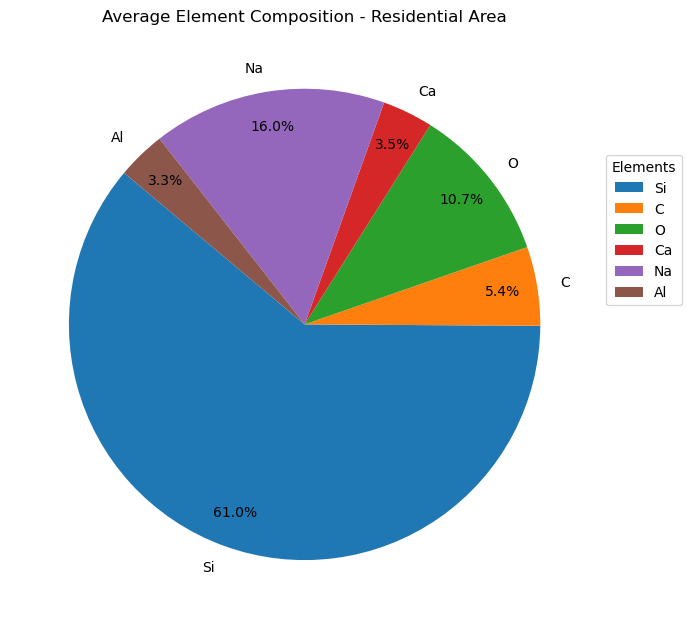

In [68]:
# Visualization of the Avearge elemental composition in the Residential Area
residential_avg = aq_data[aq_data['Location'] == 'Residential Area'][cols].mean()
residential_avg = residential_avg[residential_avg > 0.5]
plt.figure(figsize=(7, 7))
residential_avg.plot(kind='pie', autopct='%1.1f%%', startangle=140,  pctdistance=0.85, labeldistance=1.1)
plt.title('Average Element Composition - Residential Area')
plt.ylabel('')  
plt.legend(residential_avg.index, title="Elements", bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()
# The residential area has the highest concentration of Si, due to the construction activities going on the area.
# These Si particles are as a result of the silica minerals in the soil.


## Conclusion

Based on the analysis of this data, the traffic area in Badagry recorded the highest concentration of hazardous elements like Lead (Pb), followed by the market and residential areas. The dominance of quartz (Si) and aluminosilicat (Al-Si-O) particles suggests significant crustal anthropogenic (man-made) sources such as road dust and vehicle emissions. These findings point to potential health risks, especially respiratory issues, for individuals frequently exposed to these areas. To mitigate these risks, I recommend that air quality control measures be strengthened and public awareness be raised, particularly in high-traffic and market zones.